In [54]:
F0 = 45
k = 310
m = 13
c = 54
w = (k/m - 0.5*(c/m)**2)**0.5

def A(w):
    return F0/(((k - m*(w**2))**2 + (c*w)**2)**0.5)

def phase(w):
    return ma.atan((c*w)/(k-m*w**2))
    
print(w)
print(str(w**2))
print(A(w))
print(phase(w))

3.9011453332633743
15.218934911242604
0.18855556042502464
1.0815752525585152


In [56]:
((4*(4.17e5)**3)/(((2.3e6)**2)*(1.44e6)*(2/3)*(1/3)))**0.25

0.6433771409826415

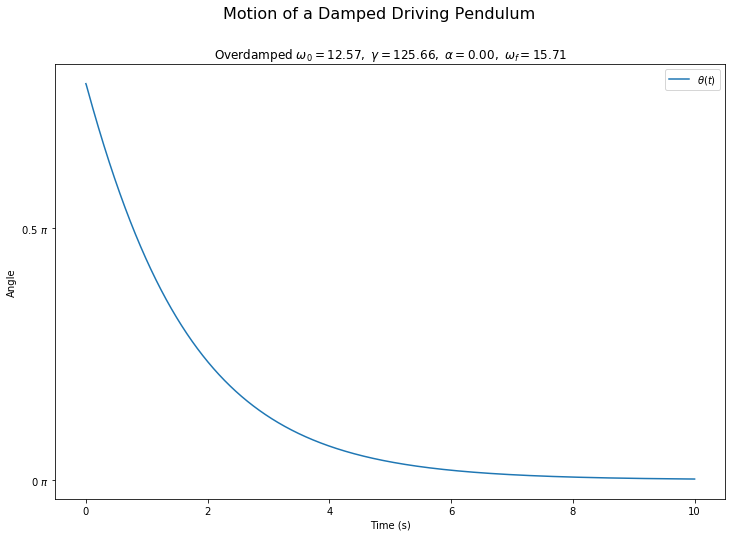

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import sympy as sp
import math as ma

def plot_pendulum_damp_driving(th0, d_fact = 1, alph = 0.5, om_f = 5*ma.pi):
    # make d_fact <1 for under, >1 for over =1 for critically
    om_0 = 4*ma.pi
    gamm = d_fact*om_0
    tmax = 10
    t0 = 0
    dt = 0.001
    
    def step(thi, thj, t, dt): #i = i, j = i-1
        th = (dt**2*om_0**2)*(alph*ma.cos(om_f*(t+dt))-ma.sin(thi)) - \
        (dt)*(2*gamm*(thi - thj)) + \
        2*thi - thj
        return th
    
    th1 = th0 - 2*(om_0**2)*ma.sin(th0)*dt**2
    t = [t0, t0+dt]
    th = [th0, th1]

    while t[-1] < tmax:
        th.append(step(th[-1], th[-2], t[-1], dt))
        t.append(t[-1] + dt)


        
    if (d_fact == 1):
        damp = 'Critically damped'
    elif (d_fact < 1):
        damp = 'Underdamped'
    else:
        damp = 'Overdamped'
    fig, ax = plt.subplots(figsize=(12,8))
    ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
    ax.yaxis.set_major_locator(tck.MultipleLocator(base=0.5))
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Angle")
    var_str = '{4} $\\omega_0 = {0:.2f}, \ \\gamma = {1:.2f}, \ \\alpha = {2:.2f}, \ \\omega_f = {3:.2f}$'.format(om_0, gamm, alph, om_f, damp)
    fig.suptitle("Motion of a Damped Driving Pendulum", fontsize=16)
    ax.set_title(var_str)
    ax.plot(t, th, label="$\\theta (t)$")
    ax.legend()
    
    
#1a
#plot_pendulum_damp_driving(th0, d_fact, alph, om_f)

plot_pendulum_damp_driving(ma.pi/4, 10, 0) #for just damping


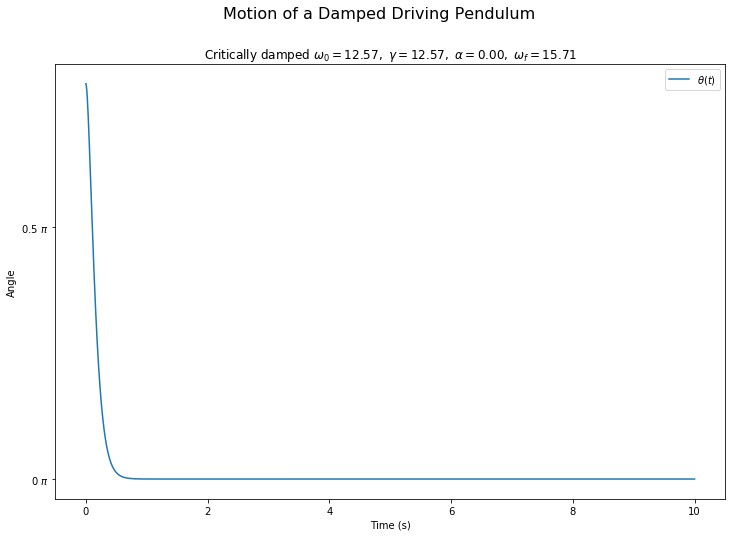

In [11]:
#1b
plot_pendulum_damp_driving(ma.pi/4, 1, 0) #for just damping

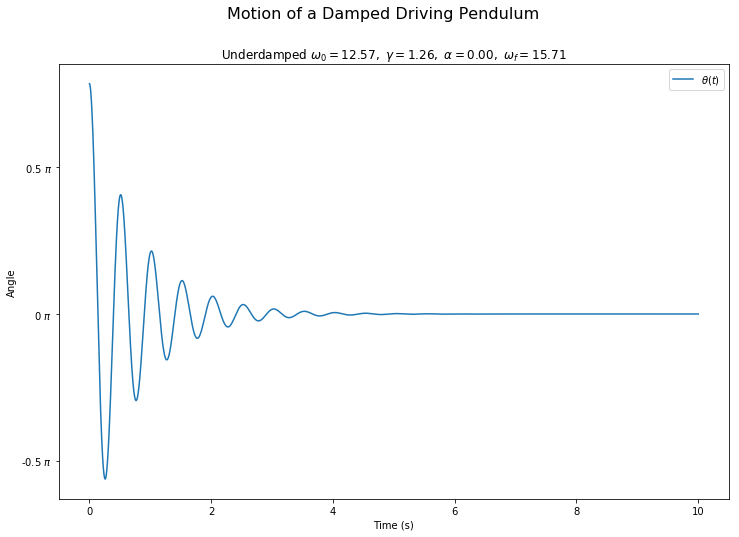

In [13]:
#1c
plot_pendulum_damp_driving(ma.pi/4, 0.1, 0) #for just damping

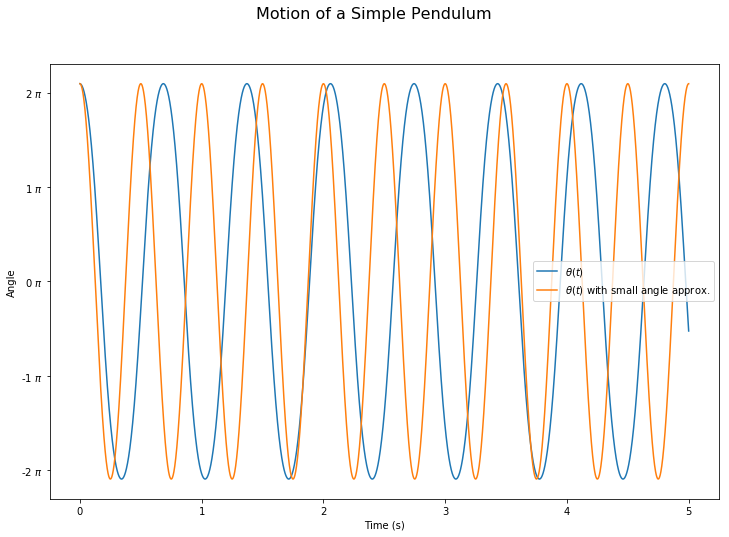

In [80]:
#1d
plot_pendulum(2*ma.pi/3)